# Laporan Proyek Machine Learning Sistem Rekomendasi Film - Muhammad Ashim Izzuddin

Notebook ini bertujuan untuk melakukan analisis terhadap dataset film dan rating, serta membangun sistem rekomendasi film menggunakan pendekatan *Content-Based Filtering* dan *Collaborative Filtering*.

## 1. Import Pustaka (Library)

**Tujuan:** Mengimpor semua pustaka Python yang diperlukan untuk analisis data, visualisasi, dan pemodelan.
**Input:** Tidak ada input langsung, hanya pemanggilan modul pustaka.
**Proses:** Menggunakan pernyataan `import` untuk memuat fungsionalitas dari berbagai pustaka seperti pandas, numpy, matplotlib, seaborn, sklearn, dan surprise.
**Output:** Lingkungan Python siap digunakan dengan semua fungsi dan kelas yang diperlukan dari pustaka yang diimpor. Pesan konfirmasi "Pustaka berhasil diimpor." akan dicetak.

In [23]:
# Impor pustaka dasar untuk manipulasi data dan numerik
import pandas as pd
import numpy as np

# Impor pustaka untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Impor pustaka utility dari Python standard library
from collections import Counter # Digunakan untuk menghitung frekuensi item

# Impor pustaka untuk pemodelan Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Impor pustaka khusus untuk sistem rekomendasi (Surprise)
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split as surprise_train_test_split
from surprise import accuracy

# Atur style untuk plot (opsional, untuk tampilan yang lebih baik)
plt.style.use('seaborn-v0_8-whitegrid') # Menggunakan style yang tersedia
print("Pustaka berhasil diimpor.")

Pustaka berhasil diimpor.


## 2. Persiapan Data (Data Loading and Overview)

Bagian ini mencakup pemuatan dataset yang akan digunakan, yaitu `movies.csv`, `ratings.csv`, dan `tags.csv`. Setelah pemuatan, akan dilakukan tinjauan awal terhadap struktur dan isi dari masing-masing dataset.

### 2.1 Pemuatan dan Tinjauan Dataset Film (`movies.csv`)

**Tujuan:** Memuat data film dari file `movies.csv` dan menampilkan informasi dasar mengenai dataset tersebut.
**Input:** File `movies.csv`.
**Proses:**
1. Membaca file CSV menggunakan `pd.read_csv()`.
2. Menampilkan 5 baris pertama data menggunakan `head()`.
3. Menampilkan jumlah total data film dan jumlah fitur.
4. Menampilkan informasi ringkas DataFrame menggunakan `info()`.
5. Memeriksa nilai unik pada kolom `genres`.
**Output:** DataFrame `movies_df` yang berisi data film. Informasi ringkas, contoh data, dan jumlah nilai unik genre akan dicetak.

In [24]:
# Pemuatan dataset movies
movies_df = pd.read_csv('movies.csv') # Sesuaikan path jika perlu

# Tampilkan 5 baris pertama
print("Dataset Movies (movies_df):")
print(movies_df.head())

# Tampilkan jumlah data dan fitur
print(f"\nJumlah data film: {movies_df.shape[0]}")
print(f"Jumlah fitur: {movies_df.shape[1]}")

# Tampilkan informasi DataFrame
print("\nInformasi Dataset Movies:")
movies_df.info()

# Memeriksa nilai unik pada kolom genres untuk pemahaman distribusi genre
print("\nContoh Nilai Unik Genre (sebelum pemisahan):")
print(movies_df['genres'].unique()[:10]) # Tampilkan 10 contoh pertama

Dataset Movies (movies_df):
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Jumlah data film: 9742
Jumlah fitur: 3

Informasi Dataset Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), o

### 2.2 Pemuatan dan Tinjauan Dataset Rating (`ratings.csv`)

**Tujuan:** Memuat data rating film dari file `ratings.csv` dan menampilkan informasi dasar mengenai dataset tersebut.
**Input:** File `ratings.csv`.
**Proses:**
1. Membaca file CSV menggunakan `pd.read_csv()`.
2. Menampilkan 5 baris pertama data.
3. Menampilkan jumlah total data rating.
4. Menampilkan statistik deskriptif untuk kolom `rating`.
5. Menampilkan informasi ringkas DataFrame.
6. Menghitung dan menampilkan jumlah pengguna unik dan film unik yang memiliki rating.
**Output:** DataFrame `ratings_df` yang berisi data rating. Informasi ringkas, contoh data, statistik rating, dan jumlah unik pengguna/film akan dicetak.

In [25]:
# Pemuatan dataset ratings
ratings_df = pd.read_csv('ratings.csv') # Sesuaikan path jika perlu

# Tampilkan 5 baris pertama
print("\nDataset Ratings (ratings_df):")
print(ratings_df.head())

# Tampilkan jumlah data
print(f"\nJumlah data rating: {ratings_df.shape[0]}")

# Statistik deskriptif untuk rating
print("\nStatistik Deskriptif Kolom Rating:")
print(ratings_df['rating'].describe())

# Tampilkan informasi DataFrame
print("\nInformasi Dataset Ratings:")
ratings_df.info()

# Jumlah pengguna unik dan film unik
print(f"Jumlah pengguna unik: {ratings_df['userId'].nunique()}")
print(f"Jumlah film unik yang dirating: {ratings_df['movieId'].nunique()}")


Dataset Ratings (ratings_df):
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Jumlah data rating: 100836

Statistik Deskriptif Kolom Rating:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Informasi Dataset Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Jumlah pengguna unik: 610
Juml

### 2.3 Pemuatan dan Tinjauan Dataset Tag (`tags.csv`)

**Tujuan:** Memuat data tag yang diberikan pengguna ke film dari file `tags.csv` dan menampilkan informasi dasar.
**Input:** File `tags.csv`.
**Proses:**
1. Membaca file CSV menggunakan `pd.read_csv()`.
2. Menampilkan 5 baris pertama data.
3. Menampilkan jumlah total data tag.
4. Menampilkan informasi ringkas DataFrame.
5. Menghitung dan menampilkan jumlah tag unik.
**Output:** DataFrame `tags_df` yang berisi data tag. Informasi ringkas, contoh data, dan jumlah tag unik akan dicetak.

In [26]:
# Pemuatan dataset tags
tags_df = pd.read_csv('tags.csv') # Sesuaikan path jika perlu

# Tampilkan 5 baris pertama
print("\nDataset Tags (tags_df):")
print(tags_df.head())

# Tampilkan jumlah data
print(f"\nJumlah data tag: {tags_df.shape[0]}")

# Tampilkan informasi DataFrame
print("\nInformasi Dataset Tags:")
tags_df.info()

# Jumlah tag unik
print(f"Jumlah tag unik: {tags_df['tag'].nunique()}")


Dataset Tags (tags_df):
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

Jumlah data tag: 3683

Informasi Dataset Tags:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
Jumlah tag unik: 1589


### 2.4 Pemuatan dan Tinjauan Dataset Link (`links.csv`) - Opsional
#
**Tujuan:** Memuat data link dari file `links.csv` untuk kelengkapan, meskipun tidak secara langsung digunakan dalam pemodelan utama.
**Input:** File `links.csv`.
**Proses:** Membaca file CSV dan menampilkan informasi dasar.
**Output:** DataFrame `links_df`.

In [27]:
# Pemuatan dataset links (opsional, sesuai deskripsi di readme)
links_df = pd.read_csv('links.csv') # Sesuaikan path jika perlu
print("\nDataset Links (links_df):")
print(links_df.head())
print(f"\nJumlah data link: {links_df.shape[0]}")
print("\nInformasi Dataset Links:")
links_df.info()


Dataset Links (links_df):
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Jumlah data link: 9742

Informasi Dataset Links:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


## 2.A Exploratory Data Analysis (EDA) & Visualisasi

Analisis data eksploratif dilakukan untuk memahami lebih dalam karakteristik dataset dan menemukan pola-pola menarik yang dapat memberikan wawasan untuk pemodelan.

### 2.A.1 Distribusi Rating Film

**Tujuan:** Menganalisis bagaimana pengguna memberikan rating, apakah cenderung tinggi, rendah, atau terdistribusi merata.
**Input:** DataFrame `ratings_df`, kolom `rating`.
**Proses:** Membuat histogram dari kolom `rating` menggunakan `seaborn.histplot`.
**Output:** Visualisasi histogram distribusi rating film. Plot akan ditampilkan.

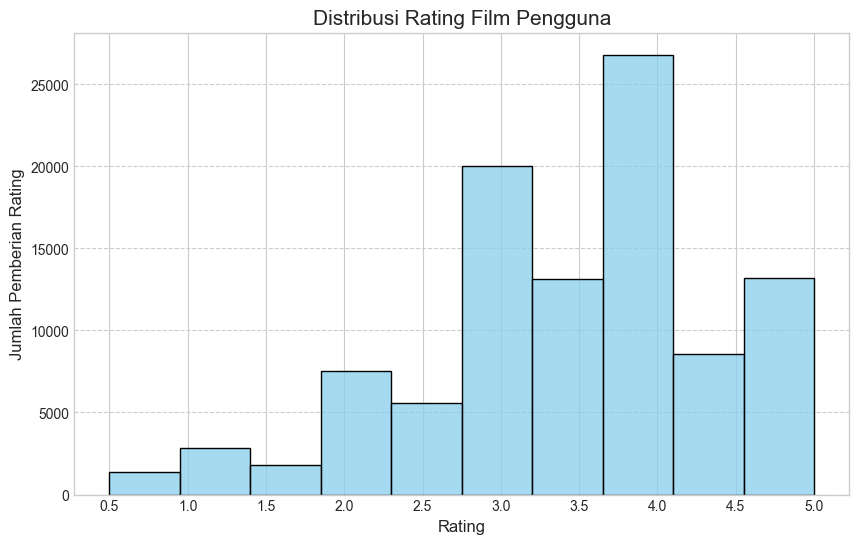

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='skyblue') 
plt.title('Distribusi Rating Film Pengguna', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Pemberian Rating', fontsize=12)
plt.xticks(np.arange(0.5, 5.5, 0.5)) 
plt.grid(axis='y', linestyle='--')
plt.show()

### 2.A.2 Distribusi Genre Film (Top 15)

**Tujuan:** Mengidentifikasi genre film yang paling populer atau sering muncul dalam dataset.
**Input:** DataFrame `movies_df`, kolom `genres`.
**Proses:**
1. Memisahkan string genre yang dipisahkan oleh `|` menjadi list genre individual.
2. Menghitung frekuensi kemunculan setiap genre menggunakan `collections.Counter`.
3. Mengambil 15 genre teratas.
4. Membuat diagram batang horizontal menggunakan `seaborn.barplot`.
**Output:** Visualisasi diagram batang 15 genre film teratas. Plot akan ditampilkan.

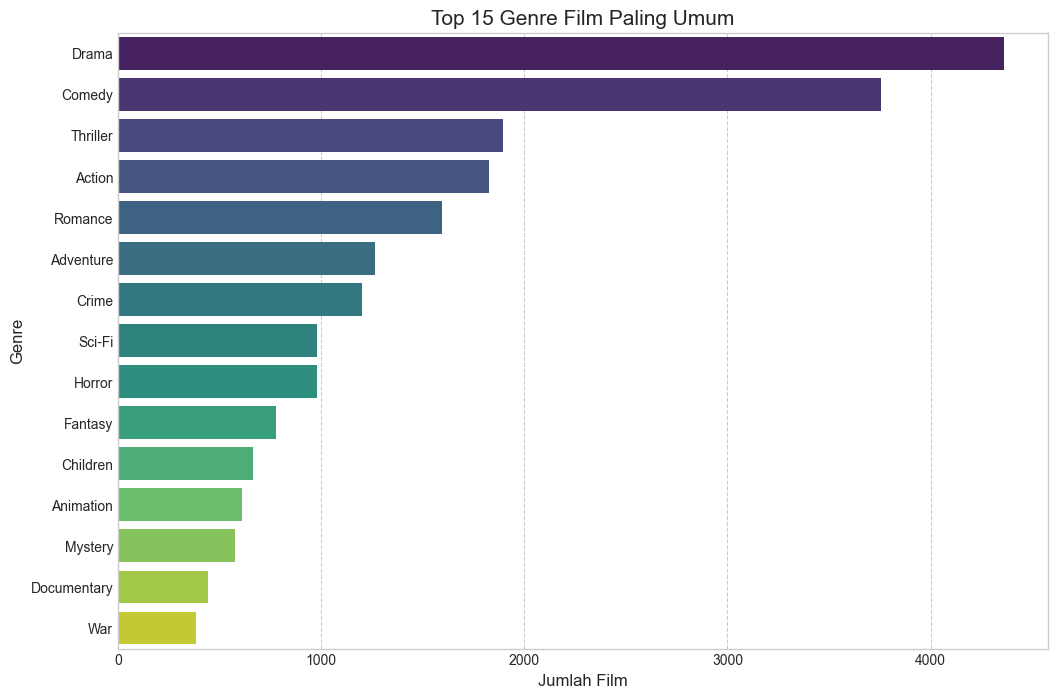

In [46]:
# Memproses genre
genre_list = []
for genres in movies_df['genres']:
    genre_list.extend(genres.split('|'))

genre_counts = Counter(genre_list)
top_15_genres = genre_counts.most_common(15)

# Membuat DataFrame untuk visualisasi
df_top_genres = pd.DataFrame(top_15_genres, columns=['Genre', 'Jumlah Film'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Jumlah Film', y='Genre', data=df_top_genres, palette='viridis', hue='Genre', dodge=False, legend=False) # Ditambahkan hue dan legend=False
plt.title('Top 15 Genre Film Paling Umum', fontsize=15)
plt.xlabel('Jumlah Film', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

### 2.A.3 Word Cloud Tag Film

**Tujuan:** Mengidentifikasi tag yang paling sering digunakan oleh pengguna untuk mendeskripsikan film secara visual.
**Input:** DataFrame `tags_df`, kolom `tag`.
**Proses:**
1. Menggabungkan semua tag (setelah diubah ke huruf kecil dan menghapus nilai NaN jika ada) menjadi satu string besar.
2. Membuat objek `WordCloud` dengan parameter yang sesuai (misalnya, `stopwords`, `background_color`).
3. Menghasilkan dan menampilkan word cloud.
**Output:** Visualisasi word cloud dari tag film. Plot akan ditampilkan.

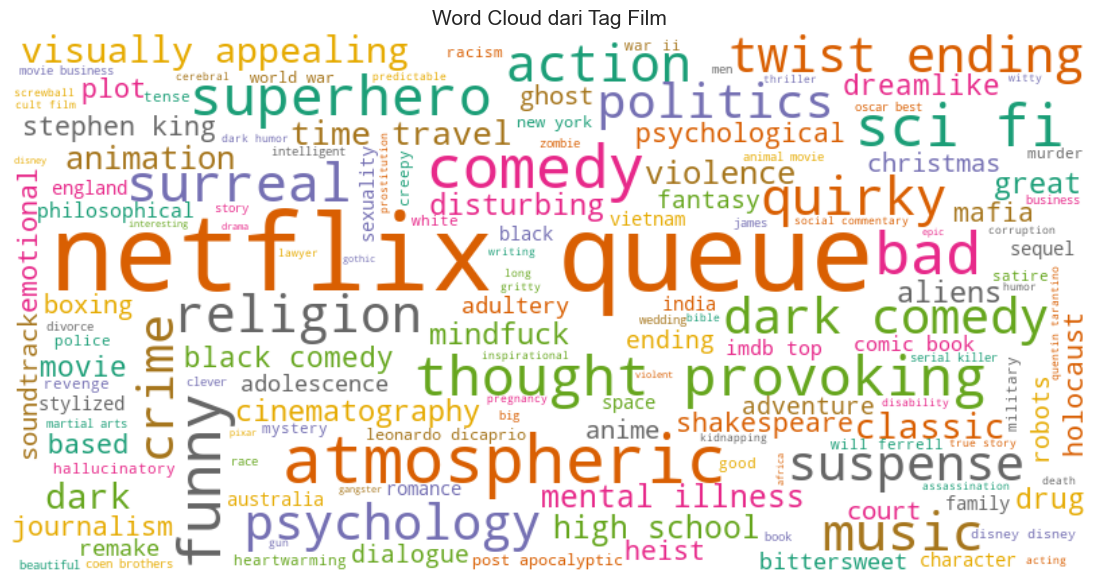

In [54]:
tags_df_for_wc = tags_df.copy()
tags_df_for_wc['tag'] = tags_df_for_wc['tag'].fillna('').astype(str).str.lower() # Pastikan semua string dan lowercase
text_tags = " ".join(tag for tag in tags_df_for_wc.tag)

# Membuat WordCloud
wordcloud = WordCloud(stopwords=None, 
                      background_color="white",
                      width=800, height=400,
                      colormap='Dark2',
                      max_words=150).generate(text_tags)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Menghilangkan sumbu
plt.title('Word Cloud dari Tag Film', fontsize=15)
plt.show()

## 3. Pra-pemrosesan dan Pembersihan Data

Tahap ini fokus pada persiapan data agar siap digunakan untuk analisis dan pemodelan. Ini termasuk penggabungan dataset, pembersihan teks, dan pembuatan fitur.

### 3.1 Penggabungan Data Film dengan Tag (untuk Content-Based Filtering)

**Tujuan:** Menggabungkan informasi tag dari `tags_df` ke `movies_df` untuk memperkaya fitur konten film.
**Input:** DataFrame `movies_df` dan `tags_df`.
**Proses:**
1. Mengonversi kolom `tag` di `tags_df` menjadi huruf kecil untuk konsistensi (sebenarnya sudah dilakukan untuk word cloud, tapi baiknya ada di sini juga).
2. Mengelompokkan `tags_df` berdasarkan `movieId` dan menggabungkan semua tag untuk setiap film menjadi satu string (dipisahkan spasi).
3. Menggabungkan DataFrame hasil agregasi tag dengan `movies_df` menggunakan `movieId` sebagai kunci. `how='left'` digunakan agar semua film tetap ada meskipun tidak memiliki tag.
4. Mengisi nilai `NaN` pada kolom `tag` (untuk film tanpa tag) dengan string kosong.
**Output:** DataFrame `movies_with_tags_df` yang berisi informasi film beserta gabungan tag-nya. Contoh data akan ditampilkan.

In [31]:
# Mengubah tag menjadi lowercase untuk konsistensi
tags_df['tag'] = tags_df['tag'].astype(str).str.lower() # Pastikan tipe string sebelum lower()

# Menggabungkan tags untuk setiap movieId
movie_tags_agg = tags_df.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# Menggabungkan dengan movies_df
movies_with_tags_df = pd.merge(movies_df, movie_tags_agg, on='movieId', how='left')

# Mengisi NaN pada kolom tag (film tanpa tag) dengan string kosong
movies_with_tags_df['tag'] = movies_with_tags_df['tag'].fillna('')

# Tampilkan contoh hasil penggabungan
print("Dataset Film dengan Tag (movies_with_tags_df):")
print(movies_with_tags_df.head())

Dataset Film dengan Tag (movies_with_tags_df):
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                            tag  
0                               pixar pixar fun  
1  fantasy magic board game robin williams game  
2                                     moldy old  
3                                                
4                              pregnancy remake  


### 3.2 Pembuatan Kolom Metadata untuk Content-Based Filtering

**Tujuan:** Membuat satu kolom teks tunggal (`metadata`) yang menggabungkan genre dan tag untuk setiap film. Kolom ini akan menjadi dasar untuk perhitungan kemiripan konten.
**Input:** DataFrame `movies_with_tags_df` (hasil dari langkah 3.1).
**Proses:**
1. Mengganti pemisah `|` pada kolom `genres` dengan spasi untuk mempermudah tokenisasi.
2. Menggabungkan konten dari kolom `genres` (yang sudah diolah) dengan kolom `tag`.
**Output:** DataFrame `movies_for_content_based_df` (yang merupakan `movies_with_tags_df` yang dimodifikasi) dengan tambahan kolom `metadata`. Contoh data akan ditampilkan.

In [32]:
# Membuat salinan DataFrame untuk menghindari SettingWithCopyWarning
movies_for_content_based_df = movies_with_tags_df.copy()

# Mengganti '|' dengan spasi pada kolom genres
movies_for_content_based_df['genres_cleaned'] = movies_for_content_based_df['genres'].str.replace('|', ' ', regex=False)

# Membuat kolom metadata dengan menggabungkan genres_cleaned dan tag
# Pastikan kedua kolom adalah string sebelum penggabungan
movies_for_content_based_df['metadata'] = movies_for_content_based_df['genres_cleaned'].astype(str) + ' ' + movies_for_content_based_df['tag'].astype(str)

# Tampilkan contoh hasil dengan kolom metadata
print("Dataset Film dengan Kolom Metadata (movies_for_content_based_df):")
print(movies_for_content_based_df[['title', 'genres', 'tag', 'metadata']].head())

Dataset Film dengan Kolom Metadata (movies_for_content_based_df):
                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                            tag  \
0                               pixar pixar fun   
1  fantasy magic board game robin williams game   
2                                     moldy old   
3                                                 
4                              pregnancy remake   

                                            metadata  
0  Adventure Animation C

## 4. Pengembangan Model Content-Based Filtering

Bagian ini menjelaskan langkah-langkah pembangunan sistem rekomendasi menggunakan pendekatan Content-Based Filtering.

### 4.1 Vektorisasi Fitur dengan TF-IDF

**Tujuan:** Mengubah data teks pada kolom `metadata` menjadi representasi numerik (vektor) menggunakan Term Frequency-Inverse Document Frequency (TF-IDF).
**Input:** Kolom `metadata` dari `movies_for_content_based_df`.
**Proses:**
1. Inisialisasi `TfidfVectorizer` dengan parameter `stop_words='english'` untuk mengabaikan kata umum dalam bahasa Inggris.
2. Melakukan fit dan transform pada kolom `metadata` untuk menghasilkan matriks TF-IDF.
**Output:** Matriks `tfidf_matrix` (representasi TF-IDF dari metadata film) dan objek `tfidf_vectorizer` yang telah dilatih. Bentuk matriks akan dicetak.

In [33]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Melakukan fit dan transform pada kolom metadata
# Pastikan metadata adalah string
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_for_content_based_df['metadata'].astype(str))

# Tampilkan bentuk dari matriks TF-IDF yang dihasilkan
print("Bentuk Matriks TF-IDF (tfidf_matrix):")
print(tfidf_matrix.shape)

Bentuk Matriks TF-IDF (tfidf_matrix):
(9742, 1677)


### 4.2 Perhitungan Kemiripan Kosinus (Cosine Similarity)

**Tujuan:** Menghitung matriks kemiripan antar film berdasarkan vektor TF-IDF yang telah dihasilkan.
**Input:** Matriks `tfidf_matrix`.
**Proses:** Menggunakan fungsi `cosine_similarity` dari `sklearn.metrics.pairwise` untuk menghitung kemiripan kosinus antar semua pasangan vektor film dalam `tfidf_matrix`.
**Output:** Matriks `cosine_sim_matrix` yang berisi skor kemiripan kosinus antar film. Bentuk matriks akan dicetak.

In [34]:
# Menghitung cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Tampilkan bentuk dari cosine similarity matrix
print("Bentuk Matriks Cosine Similarity (cosine_sim_matrix):")
print(cosine_sim_matrix.shape)
# Tampilkan contoh isi matriks (bagian kecil)
print("\nContoh Matriks Cosine Similarity (5x5 pertama):")
print(cosine_sim_matrix[:5, :5])

Bentuk Matriks Cosine Similarity (cosine_sim_matrix):
(9742, 9742)

Contoh Matriks Cosine Similarity (5x5 pertama):
[[1.         0.08807678 0.01349185 0.04835315 0.01632985]
 [0.08807678 1.         0.         0.         0.        ]
 [0.01349185 0.         1.         0.21827351 0.02402231]
 [0.04835315 0.         0.21827351 1.         0.08609303]
 [0.01632985 0.         0.02402231 0.08609303 1.        ]]


### 4.3 Pembuatan Fungsi Rekomendasi Content-Based

**Tujuan:** Membuat fungsi yang dapat memberikan daftar rekomendasi film berdasarkan kemiripan konten terhadap film input.
**Input:** Judul film (`movie_title`), matriks kemiripan (`similarity_matrix`), DataFrame film (`movies_data`), dan jumlah rekomendasi (`top_n`).
**Proses:**
1. Mencari indeks film input berdasarkan judulnya.
2. Mengambil skor kemiripan film input dengan semua film lain dari `similarity_matrix`.
3. Mengurutkan film berdasarkan skor kemiripan secara menurun.
4. Mengambil `top_n` film teratas (tidak termasuk film input itu sendiri).
5. Mengembalikan DataFrame yang berisi judul film rekomendasi, genre, tag, metadata, dan skor kemiripan.
**Output:** Fungsi `get_content_based_recommendations`.

In [35]:
# Membuat series pandas untuk mapping judul film ke indeks
movie_indices = pd.Series(movies_for_content_based_df.index, index=movies_for_content_based_df['title']).drop_duplicates()

def get_content_based_recommendations(movie_title, similarity_matrix, movies_data, top_n=10):
    """
    Memberikan rekomendasi film berdasarkan kemiripan konten.
    """
    if movie_title not in movie_indices:
        return f"Film dengan judul '{movie_title}' tidak ditemukan."

    idx = movie_indices[movie_title]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices_recs = [i[0] for i in sim_scores]
    
    # Memilih kolom yang akan ditampilkan
    columns_to_display = ['title', 'genres', 'tag', 'metadata']
    # Filter kolom yang ada di movies_data untuk menghindari error
    available_columns = [col for col in columns_to_display if col in movies_data.columns]
    
    recommended_movies = movies_data.iloc[movie_indices_recs][available_columns].copy()
    recommended_movies['similarity_score'] = [round(i[1], 4) for i in sim_scores]

    return recommended_movies

### 4.4 Uji Coba Fungsi Rekomendasi Content-Based

**Tujuan:** Menguji fungsi `get_content_based_recommendations` dengan memberikan contoh judul film.
**Input:** Judul film contoh (misalnya, 'Toy Story (1995)').
**Proses:** Memanggil fungsi `get_content_based_recommendations` dengan parameter yang sesuai.
**Output:** DataFrame berisi daftar film yang direkomendasikan untuk film input, beserta genre, tag, metadata, dan skor kemiripannya.

In [36]:
# Contoh penggunaan fungsi rekomendasi
example_movie_title_cb = 'Toy Story (1995)' 
top_n_recommendations = 5

recommendations_cb = get_content_based_recommendations(
    example_movie_title_cb,
    cosine_sim_matrix,
    movies_for_content_based_df, 
    top_n=top_n_recommendations
)

print(f"\nRekomendasi Content-Based untuk '{example_movie_title_cb}' (Top {top_n_recommendations}):")
if isinstance(recommendations_cb, str):
    print(recommendations_cb) 
else:
    if not recommendations_cb.empty:
        print(recommendations_cb[['title', 'genres', 'metadata', 'similarity_score']]) # Menampilkan 'metadata' juga
    else:
        print("Tidak ada rekomendasi yang dihasilkan (DataFrame kosong).")


Rekomendasi Content-Based untuk 'Toy Story (1995)' (Top 5):
                                               title  \
1757                            Bug's Life, A (1998)   
2355                              Toy Story 2 (1999)   
8695                Guardians of the Galaxy 2 (2017)   
1706                                     Antz (1998)   
2809  Adventures of Rocky and Bullwinkle, The (2000)   

                                           genres  \
1757          Adventure|Animation|Children|Comedy   
2355  Adventure|Animation|Children|Comedy|Fantasy   
8695                      Action|Adventure|Sci-Fi   
1706  Adventure|Animation|Children|Comedy|Fantasy   
2809  Adventure|Animation|Children|Comedy|Fantasy   

                                               metadata  similarity_score  
1757          Adventure Animation Children Comedy pixar            0.8622  
2355  Adventure Animation Children Comedy Fantasy an...            0.6440  
8695                        Action Adventure Sci-Fi fun

## 5. Pengembangan Model Collaborative Filtering (SVD)

Bagian ini menjelaskan langkah-langkah pembangunan sistem rekomendasi menggunakan pendekatan Collaborative Filtering dengan algoritma Singular Value Decomposition (SVD) dari library Surprise.

### 5.1 Persiapan Data untuk Library Surprise

**Tujuan:** Mengubah dataset rating ke dalam format yang dapat diterima oleh library Surprise.
**Input:** DataFrame `ratings_df` (hanya kolom `userId`, `movieId`, `rating`).
**Proses:**
1. Membuat objek `Reader` dari Surprise, mendefinisikan skala rating (misalnya, 1 hingga 5).
2. Memuat data dari DataFrame pandas ke dalam format dataset Surprise menggunakan `Dataset.load_from_df()`.
**Output:** Objek `data_surprise` yang siap digunakan untuk melatih model Surprise.

In [37]:
# Persiapan data untuk Surprise
reader = Reader(rating_scale=(0.5, 5.0)) 
data_surprise = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

print("Data berhasil dimuat ke dalam format Surprise.")

Data berhasil dimuat ke dalam format Surprise.


### 5.2 Pelatihan Model SVD

**Tujuan:** Melatih model SVD menggunakan seluruh dataset rating yang telah disiapkan.
**Input:** Objek `data_surprise`.
**Proses:**
1. Membangun `trainset` penuh dari `data_surprise`.
2. Inisialisasi model `SVD` dengan parameter default atau parameter yang telah ditentukan (misalnya, `n_factors`, `n_epochs`, `lr_all`, `reg_all`, `random_state`).
3. Melatih model SVD menggunakan `trainset` penuh.
**Output:** Model `svd_model` yang telah dilatih dan siap digunakan untuk membuat prediksi. Pesan konfirmasi akan dicetak.

In [38]:
# Membangun trainset penuh untuk melatih model akhir
full_trainset = data_surprise.build_full_trainset()

# Inisialisasi model SVD
svd_model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42)

# Melatih model
print("Memulai pelatihan model SVD...")
svd_model.fit(full_trainset)
print("Pelatihan model SVD selesai.")

Memulai pelatihan model SVD...
Pelatihan model SVD selesai.


### 5.3 Pembuatan Fungsi Rekomendasi Collaborative Filtering

**Tujuan:** Membuat fungsi yang dapat memberikan daftar rekomendasi film untuk pengguna tertentu, mengecualikan film yang sudah pernah dirating oleh pengguna tersebut.
**Input:** ID pengguna (`user_id`), model SVD terlatih (`model`), DataFrame film (`movies_data`), DataFrame rating (`ratings_data`), dan jumlah rekomendasi (`top_n`).
**Proses:**
1. Mendapatkan daftar semua `movieId` unik.
2. Mendapatkan daftar `movieId` yang sudah dirating oleh `user_id`.
3. Membuat daftar film yang belum dirating oleh `user_id`.
4. Memprediksi rating untuk setiap film yang belum dirating menggunakan model SVD.
5. Mengurutkan film berdasarkan prediksi rating secara menurun.
6. Mengambil `top_n` film teratas.
7. Menggabungkan dengan `movies_data` untuk mendapatkan judul film.
**Output:** Fungsi `get_collaborative_filtering_recommendations`.

In [39]:
def get_collaborative_filtering_recommendations(user_id, model, movies_data, ratings_data, top_n=10):
    """
    Memberikan rekomendasi film untuk pengguna menggunakan model Collaborative Filtering (SVD).
    """
    all_movie_ids = movies_data['movieId'].unique()
    rated_movie_ids = ratings_data[ratings_data['userId'] == user_id]['movieId'].unique()
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]

    if not unrated_movie_ids:
        return "Pengguna telah merating semua film yang tersedia atau tidak ada film lagi untuk direkomendasikan."

    predictions = []
    for movie_id in unrated_movie_ids:
        pred = model.predict(uid=user_id, iid=movie_id)
        predictions.append((movie_id, pred.est)) 

    predictions.sort(key=lambda x: x[1], reverse=True)
    top_predictions = predictions[:top_n]
    recommended_movie_ids = [pred[0] for pred in top_predictions]
    recommended_movies_details = movies_data[movies_data['movieId'].isin(recommended_movie_ids)].copy() 
    estimated_ratings_map = {pred[0]: round(pred[1], 4) for pred in top_predictions}
    recommended_movies_details['estimated_rating'] = recommended_movies_details['movieId'].map(estimated_ratings_map)
    recommended_movies_details = recommended_movies_details.sort_values(by='estimated_rating', ascending=False)

    return recommended_movies_details[['movieId', 'title', 'genres', 'estimated_rating']]

### 5.4 Uji Coba Fungsi Rekomendasi Collaborative Filtering

**Tujuan:** Menguji fungsi `get_collaborative_filtering_recommendations` dengan memberikan ID pengguna contoh.
**Input:** ID pengguna contoh (misalnya, `userId = 1`).
**Proses:** Memanggil fungsi `get_collaborative_filtering_recommendations` dengan parameter yang sesuai.
**Output:** DataFrame berisi daftar film yang direkomendasikan untuk pengguna input, beserta estimasi ratingnya.

In [40]:
# Contoh penggunaan fungsi rekomendasi collaborative filtering
example_user_id_cf = 1 
recommendations_cf = get_collaborative_filtering_recommendations(
    example_user_id_cf,
    svd_model,
    movies_df, 
    ratings_df,
    top_n=5
)

print(f"\nRekomendasi Collaborative Filtering (SVD) untuk User ID {example_user_id_cf}:")
if isinstance(recommendations_cf, str):
    print(recommendations_cf)
else:
    print(recommendations_cf)


Rekomendasi Collaborative Filtering (SVD) untuk User ID 1:
     movieId                             title             genres  \
210      246                Hoop Dreams (1994)        Documentary   
277      318  Shawshank Redemption, The (1994)        Crime|Drama   
659      858             Godfather, The (1972)        Crime|Drama   
694      912                 Casablanca (1942)      Drama|Romance   
695      913        Maltese Falcon, The (1941)  Film-Noir|Mystery   

     estimated_rating  
210               5.0  
277               5.0  
659               5.0  
694               5.0  
695               5.0  


## 6. Evaluasi Model

Bagian ini akan fokus pada evaluasi performa model yang telah dibangun.

### 6.1 Evaluasi Model Collaborative Filtering (SVD) dengan Cross-Validation

**Tujuan:** Mengevaluasi model SVD menggunakan teknik 5-fold cross-validation untuk mendapatkan estimasi performa yang lebih robust pada data yang tidak terlihat. Metrik yang digunakan adalah RMSE (Root Mean Squared Error) dan MAE (Mean Absolute Error).
**Input:**
  * `data_surprise`: Seluruh dataset dalam format Surprise.
  * Objek model SVD baru yang diinisialisasi dengan parameter yang sama dengan `svd_model` (untuk konsistensi evaluasi).
**Proses:**
1. Inisialisasi ulang model SVD (`svd_model_eval`) dengan parameter yang sama seperti yang digunakan untuk pelatihan model akhir (penting untuk evaluasi yang adil).
2. Menggunakan fungsi `cross_validate` dari Surprise dengan `cv=5` untuk melakukan 5-fold cross-validation.
3. Metrik yang dihitung adalah `rmse` dan `mae`.
4. Menghitung dan menampilkan rata-rata RMSE dan MAE dari semua fold.
**Output:** Hasil cross-validation (termasuk skor per fold) dan rata-rata RMSE serta MAE akan dicetak.

In [41]:
# Inisialisasi model SVD baru untuk evaluasi (menggunakan parameter yang sama dengan model yang dilatih)
svd_model_eval = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42)

# Melakukan cross-validation
print("\nMemulai Cross-Validation untuk model SVD...")
cv_results_svd = cross_validate(svd_model_eval, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Menampilkan rata-rata RMSE dan MAE
mean_rmse_svd = cv_results_svd['test_rmse'].mean()
mean_mae_svd = cv_results_svd['test_mae'].mean()

print(f"\nRata-rata RMSE (SVD) dari 5-fold Cross-Validation: {mean_rmse_svd:.4f}")
print(f"Rata-rata MAE (SVD) dari 5-fold Cross-Validation: {mean_mae_svd:.4f}")


Memulai Cross-Validation untuk model SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8684  0.8800  0.8713  0.8798  0.8727  0.8745  0.0047  
MAE (testset)     0.6661  0.6753  0.6711  0.6757  0.6709  0.6718  0.0035  
Fit time          0.63    0.66    0.66    0.69    0.63    0.65    0.02    
Test time         0.06    0.06    0.13    0.06    0.06    0.08    0.03    

Rata-rata RMSE (SVD) dari 5-fold Cross-Validation: 0.8745
Rata-rata MAE (SVD) dari 5-fold Cross-Validation: 0.6718


### 6.2 Evaluasi Model Content-Based Filtering dengan Presisi

**Tujuan:** Menghitung metrik Precision@k untuk model Content-Based Filtering. Precision@k mengukur seberapa banyak item yang direkomendasikan dalam Top-k yang relevan dengan item input.
**Definisi Relevan:** Sebuah film rekomendasi dianggap 'relevan' jika berbagi **minimal satu genre** dengan film input yang menjadi dasar rekomendasi.
**Input:**
  * `input_movie_title`: Judul film yang dijadikan dasar rekomendasi.
  * `similarity_matrix`: Matriks kemiripan kosinus (`cosine_sim_matrix`).
  * `movies_data`: DataFrame film yang berisi informasi 'title' dan 'genres' (`movies_for_content_based_df`).
  * `top_n`: Jumlah rekomendasi teratas yang dievaluasi (nilai k).
**Proses:**
1. Dapatkan genre dari film input.
2. Dapatkan Top-N rekomendasi untuk film input menggunakan fungsi `get_content_based_recommendations`.
3. Untuk setiap film yang direkomendasikan, periksa apakah ada irisan genre dengan film input.
4. Hitung jumlah film rekomendasi yang relevan.
5. Hitung presisi: (Jumlah rekomendasi relevan) / `top_n`.
**Output:** Fungsi `calculate_precision_for_content_based` dan hasil perhitungan presisi untuk contoh film.

In [42]:
def calculate_precision_for_content_based(input_movie_title, similarity_matrix, movies_data, top_n=10):
    """
    Menghitung Precision@k untuk model Content-Based Filtering.
    Film rekomendasi dianggap relevan jika berbagi minimal satu genre dengan film input.
    """
    if input_movie_title not in movie_indices: 
        print(f"Film '{input_movie_title}' tidak ditemukan dalam movie_indices.")
        return None # Mengembalikan None jika film tidak ditemukan

    input_movie_details = movies_data[movies_data['title'] == input_movie_title]
    if input_movie_details.empty:
        print(f"Detail film '{input_movie_title}' tidak ditemukan dalam movies_data.")
        return None # Mengembalikan None jika detail film tidak ditemukan

    input_genres_str = input_movie_details['genres'].iloc[0]
    input_genres_set = set(input_genres_str.split('|'))

    recommendations_df = get_content_based_recommendations(
        input_movie_title,
        similarity_matrix,
        movies_data, 
        top_n=top_n
    )

    if isinstance(recommendations_df, str) or recommendations_df.empty:
        # Jika tidak ada rekomendasi atau error string dari get_content_based_recommendations
        print(f"Tidak ada rekomendasi yang valid untuk '{input_movie_title}' atau terjadi error dalam get_content_based_recommendations.")
        return 0.0 

    relevant_recommendations_count = 0
    for index, rec_movie in recommendations_df.iterrows():
        rec_genres_str = rec_movie['genres']
        rec_genres_set = set(rec_genres_str.split('|'))

        if not input_genres_set.isdisjoint(rec_genres_set):
            relevant_recommendations_count += 1

    precision = relevant_recommendations_count / top_n if top_n > 0 else 0.0
    return precision

### 6.2.1 Uji Coba Perhitungan Presisi untuk Content-Based Filtering

**Tujuan:** Menguji fungsi `calculate_precision_for_content_based` dengan film contoh dan menampilkan hasilnya.
**Input:** Judul film contoh, matriks kemiripan, DataFrame film, dan nilai K untuk Precision@K.
**Proses:** Memanggil fungsi `calculate_precision_for_content_based` dan mencetak skor presisi yang dihasilkan.
**Output:** Nilai Precision@k untuk film contoh akan dicetak.

In [43]:
# Uji coba perhitungan presisi untuk Content-Based
example_movie_title_precision = 'Toy Story (1995)' 
k_value_precision = 10 

precision_score_cb = calculate_precision_for_content_based(
    example_movie_title_precision,
    cosine_sim_matrix,
    movies_for_content_based_df, 
    top_n=k_value_precision
)

# Cetak hasil presisi
if precision_score_cb is not None: # Periksa jika None dikembalikan (misal film tidak ditemukan)
    print(f"\nPrecision@{k_value_precision} untuk Content-Based Filtering pada film '{example_movie_title_precision}': {precision_score_cb:.2f}")
else:
    # Ini akan menangani kasus di mana film input tidak ditemukan di awal fungsi presisi
    print(f"Tidak dapat menghitung presisi untuk film '{example_movie_title_precision}' karena film tidak ditemukan atau error lainnya.")


Precision@10 untuk Content-Based Filtering pada film 'Toy Story (1995)': 1.00


## 7. Kesimpulan

**Tujuan:** Memberikan ringkasan singkat mengenai apa yang telah dilakukan dan dicapai dalam notebook ini.
**Input:** Hasil dari analisis, pemodelan, dan evaluasi.
**Proses:** Merangkum temuan utama dari setiap pendekatan sistem rekomendasi yang dibangun.
**Output:** Teks kesimpulan.
*Catatan: Kesimpulan akhir akan ditulis lebih detail di file laporan `.md`.*

In [44]:
# Ini adalah placeholder. Kesimpulan yang lebih rinci akan ada di laporan Markdown.
print("\n## Ringkasan Notebook (Placeholder):")
print("- Data film, rating, dan tag berhasil dimuat dan diproses.")
print("- Analisis data eksploratif (EDA) dan visualisasi telah dilakukan untuk memahami distribusi data.")
print("- Model Content-Based Filtering dibangun menggunakan TF-IDF dan Cosine Similarity.")
print(f"  - Contoh rekomendasi untuk '{example_movie_title_cb}' telah ditampilkan.")
if precision_score_cb is not None:
    print(f"  - Estimasi Precision@{k_value_precision} untuk film contoh: {precision_score_cb:.2f}")
print("- Model Collaborative Filtering (SVD) dibangun dan dilatih.")
print(f"  - Contoh rekomendasi untuk User ID {example_user_id_cf} telah ditampilkan.")
print(f"  - Performa SVD dievaluasi dengan 5-fold cross-validation: Rata-rata RMSE = {mean_rmse_svd:.4f}, MAE = {mean_mae_svd:.4f}.")
print("\nDetail analisis, interpretasi model, dan pembahasan evaluasi yang lebih mendalam akan disajikan dalam laporan proyek.")


## Ringkasan Notebook (Placeholder):
- Data film, rating, dan tag berhasil dimuat dan diproses.
- Analisis data eksploratif (EDA) dan visualisasi telah dilakukan untuk memahami distribusi data.
- Model Content-Based Filtering dibangun menggunakan TF-IDF dan Cosine Similarity.
  - Contoh rekomendasi untuk 'Toy Story (1995)' telah ditampilkan.
  - Estimasi Precision@10 untuk film contoh: 1.00
- Model Collaborative Filtering (SVD) dibangun dan dilatih.
  - Contoh rekomendasi untuk User ID 1 telah ditampilkan.
  - Performa SVD dievaluasi dengan 5-fold cross-validation: Rata-rata RMSE = 0.8745, MAE = 0.6718.

Detail analisis, interpretasi model, dan pembahasan evaluasi yang lebih mendalam akan disajikan dalam laporan proyek.
